In [1]:
import numpy as np 
import random, os
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [2]:
weather_path = r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_zone_1_.csv'
save_path = r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\savedData\CAISO_zone_1_.csv'

In [4]:
iso_list = [ 'CAISO','NYISO','PJM','ERCOT','MISO','SPP']
iso_zone_list = {
    'CAISO':['CAISO_zone_'+str(num)+"_"  for num in range(1,4+1)],
    'NYISO':['NYISO_zone_'+str(num)+"_"  for num in range(1,11+1)],
    'PJM':['PJM_zone_'+str(num)+"_"  for num in range(1,20+1)],
    'ERCOT':['ERCOT_zone_'+str(num)+"_"  for num in range(1,8+1)],
    'MISO':['MISO_zone_'+str(num)+"_"  for num in range(1,6+1)],
    'SPP':['SPP_zone_'+str(num)+"_"  for num in range(1,17+1)],
}
year_list = ['2018','2019','2020']

In [3]:
data = pd.read_csv(weather_path, delimiter = ',')

In [4]:
data.head()

,time,load_power,wind_power,solar_power,DHI,DNI,GHI,Dew Point,Solar Zenith Angle,Wind Speed,Relative Humidity,Temperature
0,2018-01-01 00:00:00,0.785327,0.004276,0.0,0.0,0.0,0.0,-7.7,168.880,1.2,23.78,12.5
1,2018-01-01 00:01:00,0.784770,0.004346,0.0,0.0,0.0,0.0,-7.7,168.842,1.2,23.78,12.5
2,2018-01-01 00:02:00,0.784213,0.004416,0.0,0.0,0.0,0.0,-7.7,168.804,1.2,23.78,12.5
3,2018-01-01 00:03:00,0.783657,0.004486,0.0,0.0,0.0,0.0,-7.7,168.766,1.2,23.78,12.5
4,2018-01-01 00:04:00,0.783100,0.004556,0.0,0.0,0.0,0.0,-7.7,168.728,1.2,23.78,12.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573923 entries, 0 to 1573922
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   time                1573923 non-null  object 
 1   load_power          1573923 non-null  float64
 2   wind_power          1573923 non-null  float64
 3   solar_power         1573923 non-null  float64
 4   DHI                 1573923 non-null  float64
 5   DNI                 1573923 non-null  float64
 6   GHI                 1573923 non-null  float64
 7   Dew Point           1573923 non-null  float64
 8   Solar Zenith Angle  1573923 non-null  float64
 9   Wind Speed          1573923 non-null  float64
 10  Relative Humidity   1573923 non-null  float64
 11  Temperature         1573923 non-null  float64
dtypes: float64(11), object(1)
memory usage: 144.1+ MB


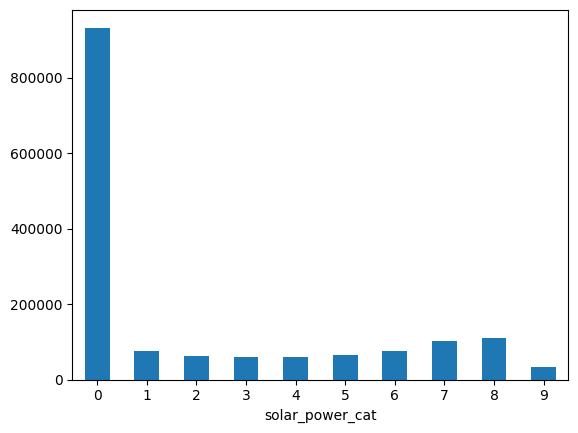

In [14]:
data["solar_power_cat"] = pd.cut(data["solar_power"],bins=10,
                               labels=False)
data["solar_power_cat"].value_counts().sort_index().plot.bar(rot=0)
plt.show()
#why are the bins split up like this?

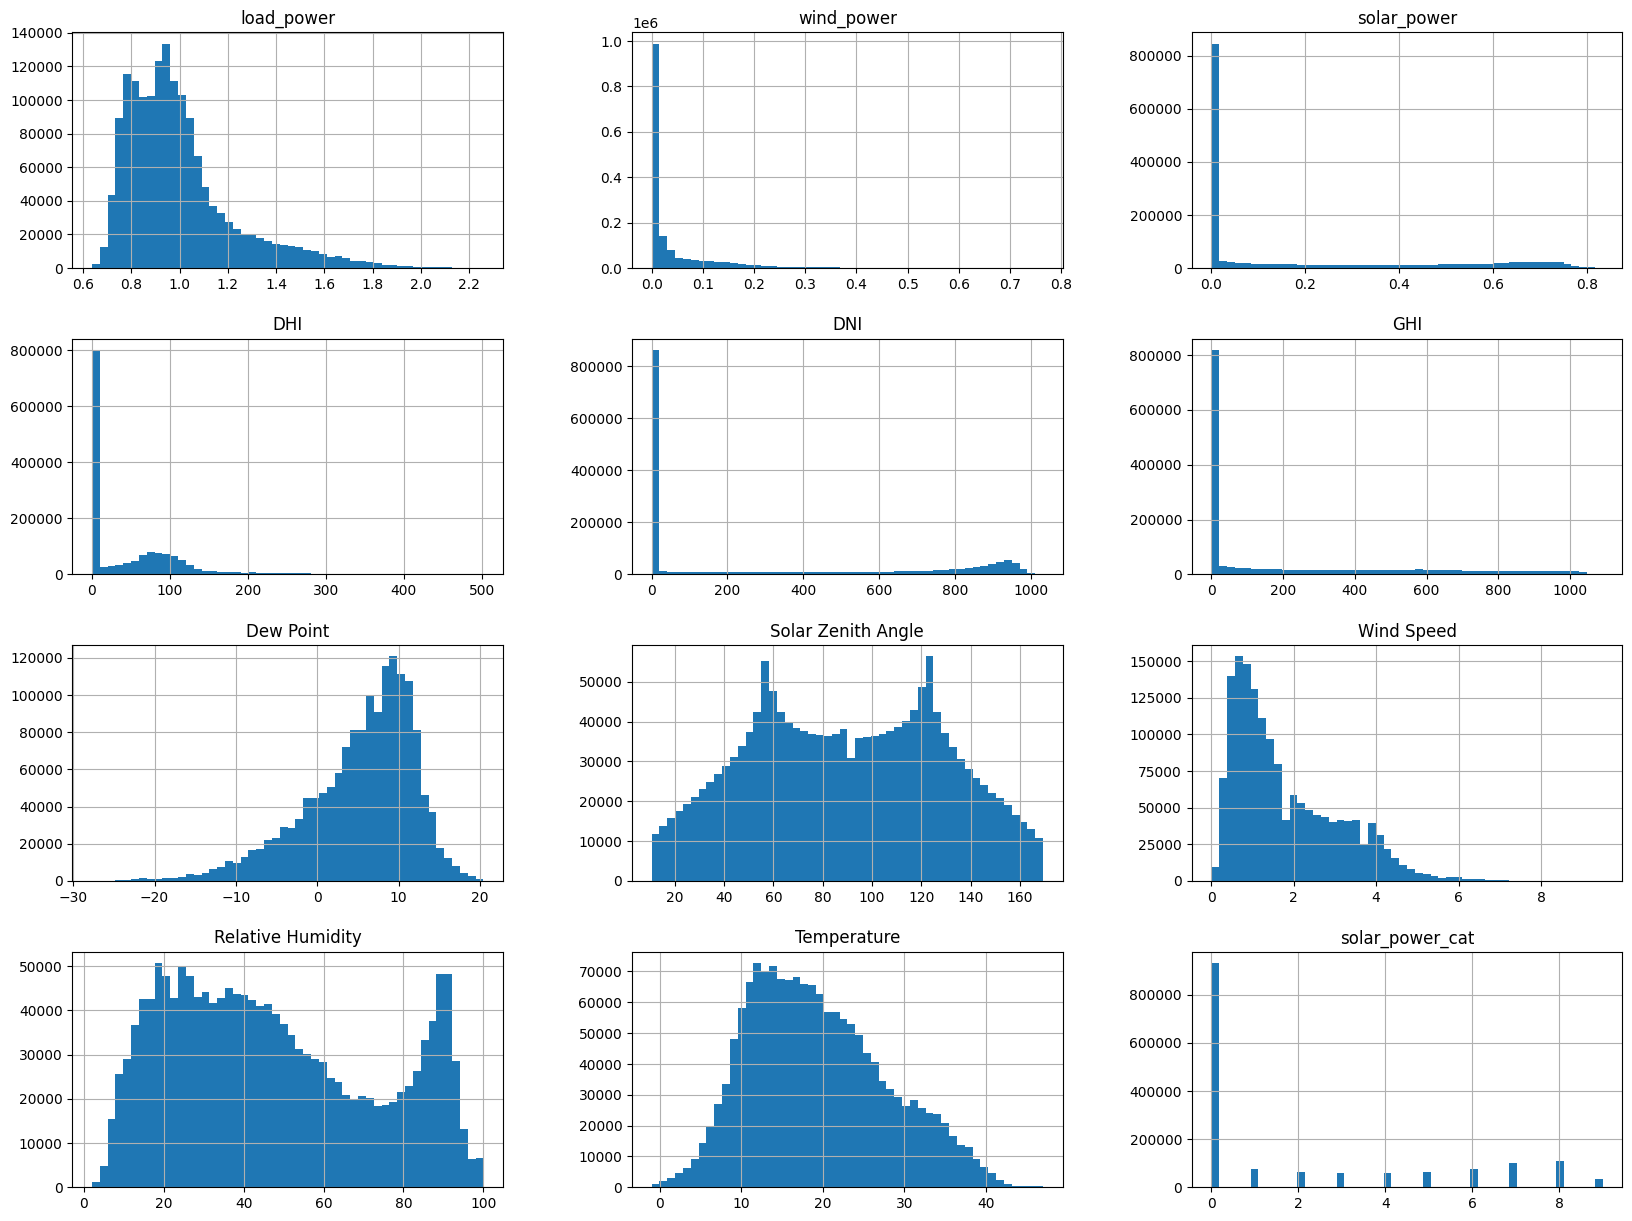

In [59]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
attritbutes = ["solar_power","Dew Point","Temperature","Relative Humidity", "Solar Zenith Angle", "DHI", "DNI", "GHI", "load_power"]
scatter_matrix(data[attritbutes])
plt.show()

In [5]:
print((data["time"][100000]))
date_format = '%Y-%m-%d %H:%M:%S'
date_obj = datetime.strptime(data["time"][100000], date_format)
print(date_obj)

print(date_obj.time())

2018-03-11 10:40:00
2018-03-11 10:40:00
10:40:00


In [17]:
attributes= ["time", "solar_power", "GHI", "DHI", "DNI", "Solar Zenith Angle", "wind_power", "load_power", "Temperature", "Relative Humidity", "Wind Speed"]
date_format = '%Y-%m-%d %H:%M:%S'
df = pd.DataFrame(data[attributes])
df['time'] = pd.to_datetime(df['time'], format=date_format)
def reset_df():
    df = pd.DataFrame(data[attributes])
    df['time'] = pd.to_datetime(df['time'], format=date_format)

In [7]:
df["time"] = df["time"].dt.time
year = 525600
month = 43800
day = 1440
df = df.iloc[:525600*3]

In [27]:
reset_df()
results = []
df_per_day_attributes = ["time", "DHI", "GHI", "DNI"]
for i in range(0, len(df), 1440):
    avg_dhi = df["DHI"].iloc[i:i+1440].mean()
    avg_ghi = df["GHI"].iloc[i:i+1440].mean()
    avg_dni = df["DNI"].iloc[i:i+1440].mean()
    results.append({"time": df['time'][i], "DHI": avg_dhi, "GHI": avg_ghi, "DNI": avg_dni})
df_per_day = pd.DataFrame(results)


In [58]:
df['time_float'] = df['time'].dt.hour * 60 + df['time'].dt.minute + df['time'].dt.second / 60

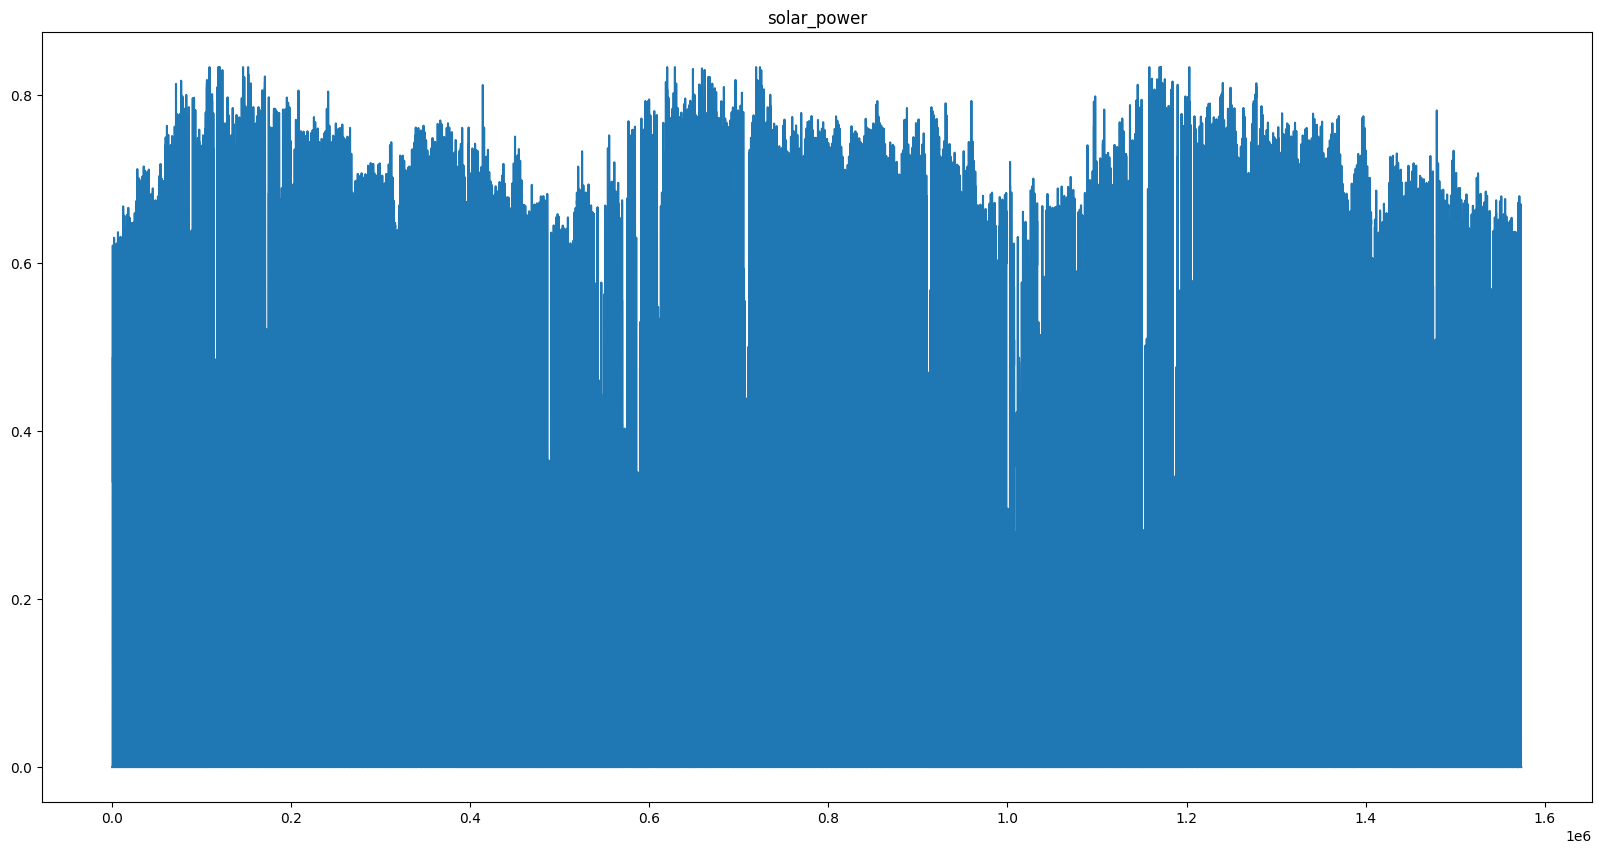

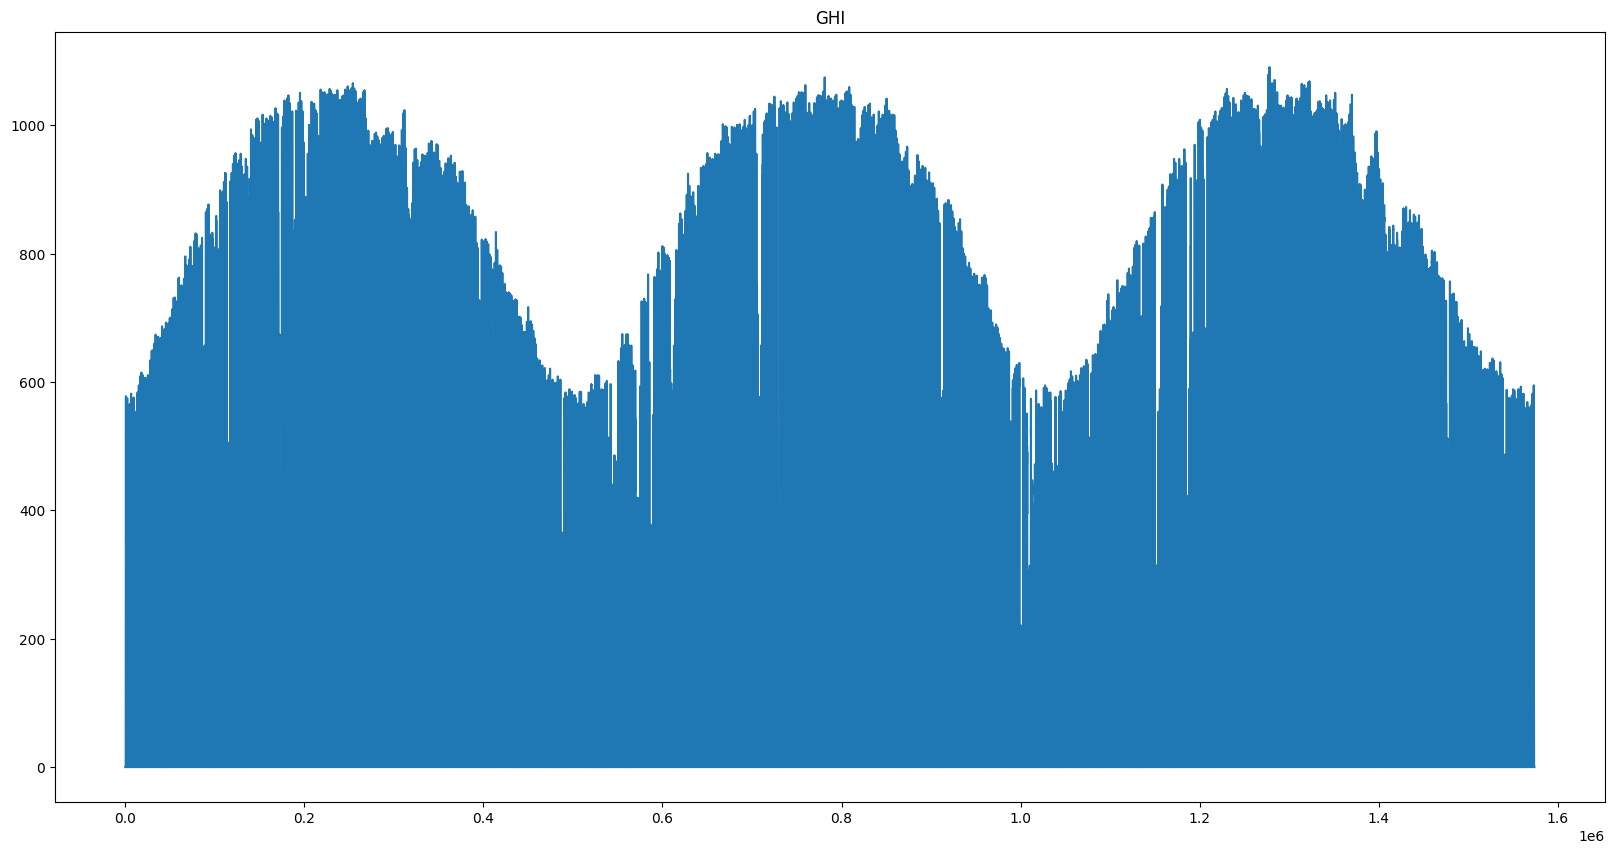

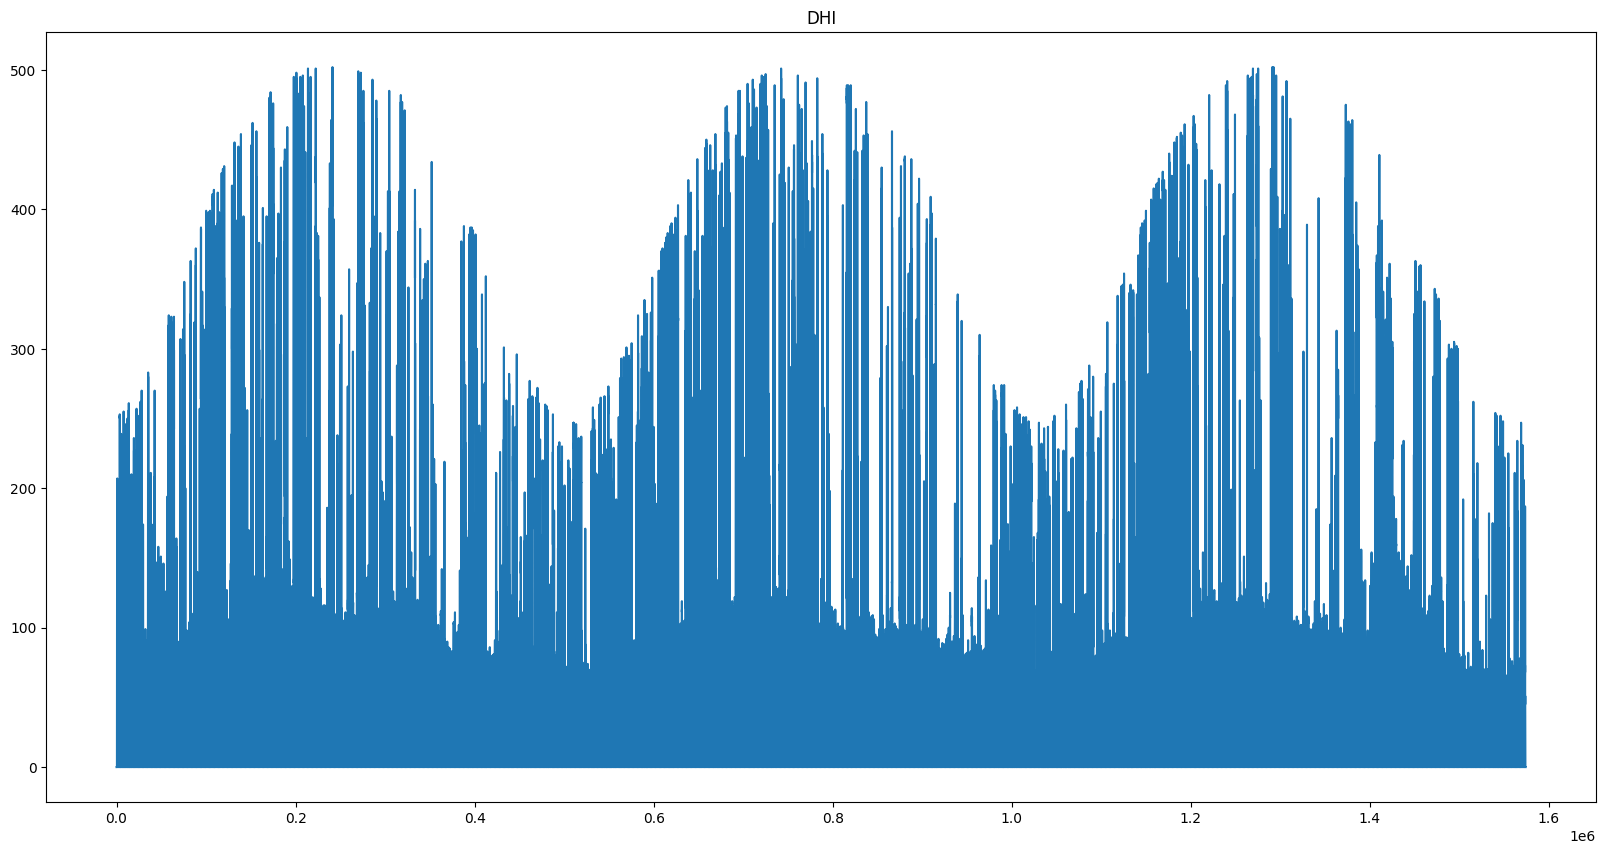

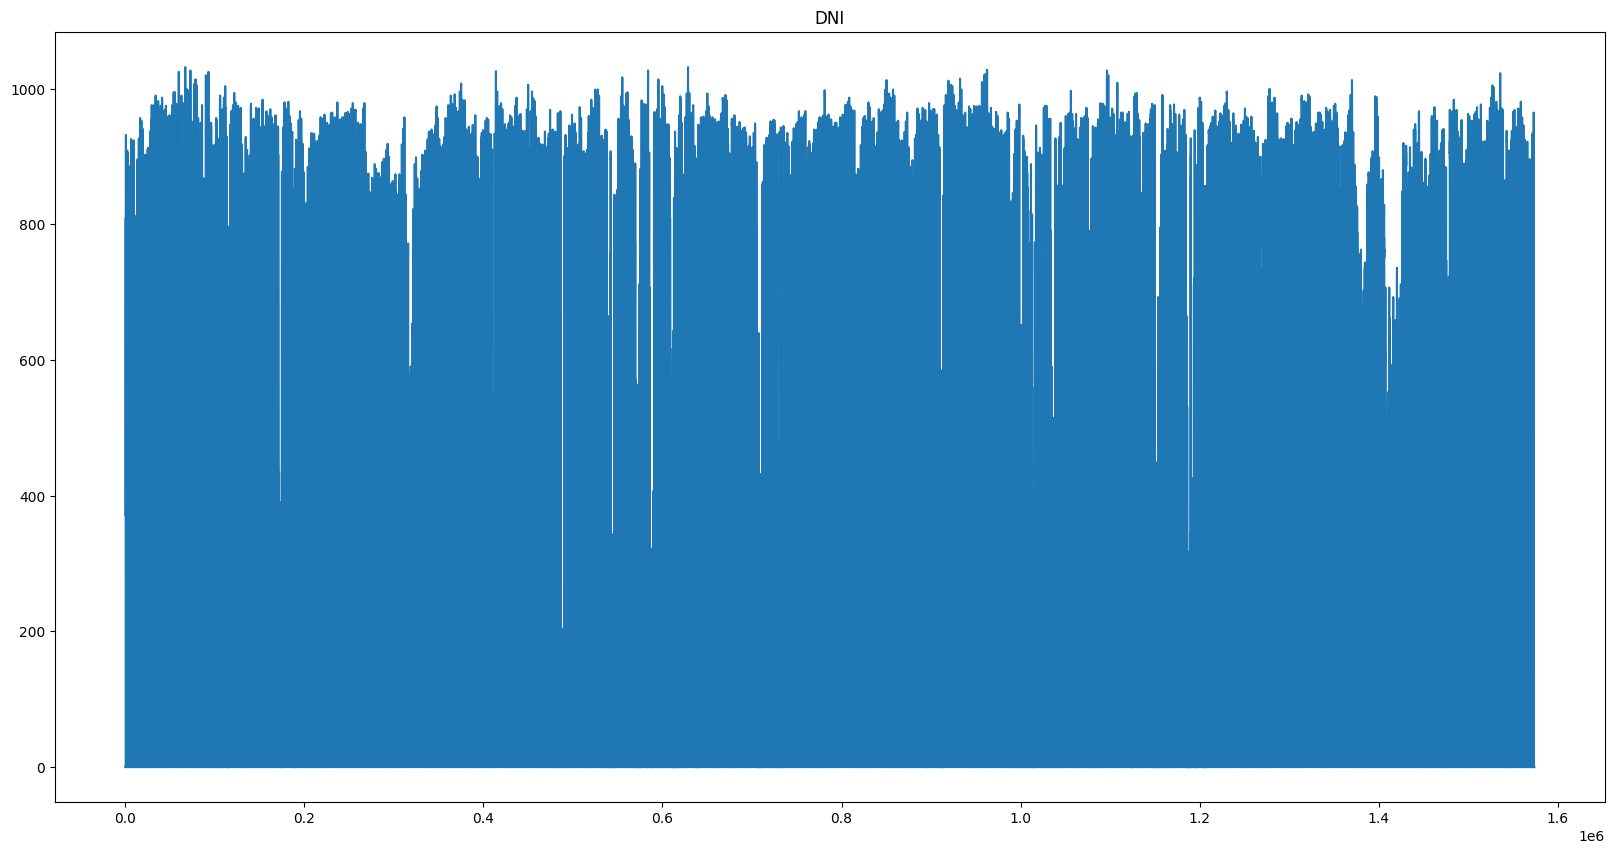

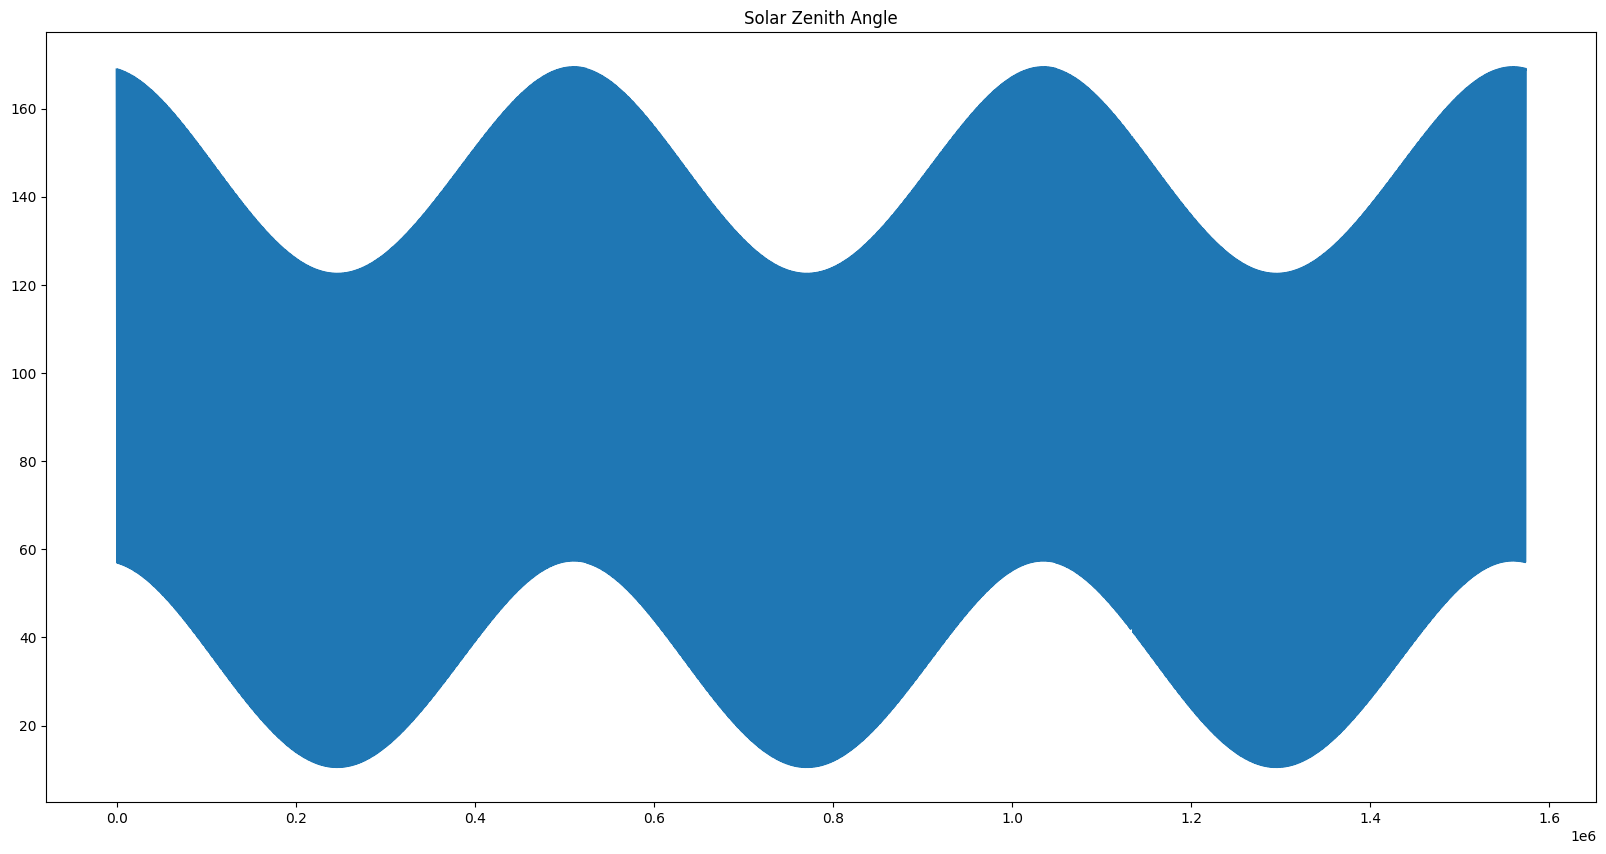

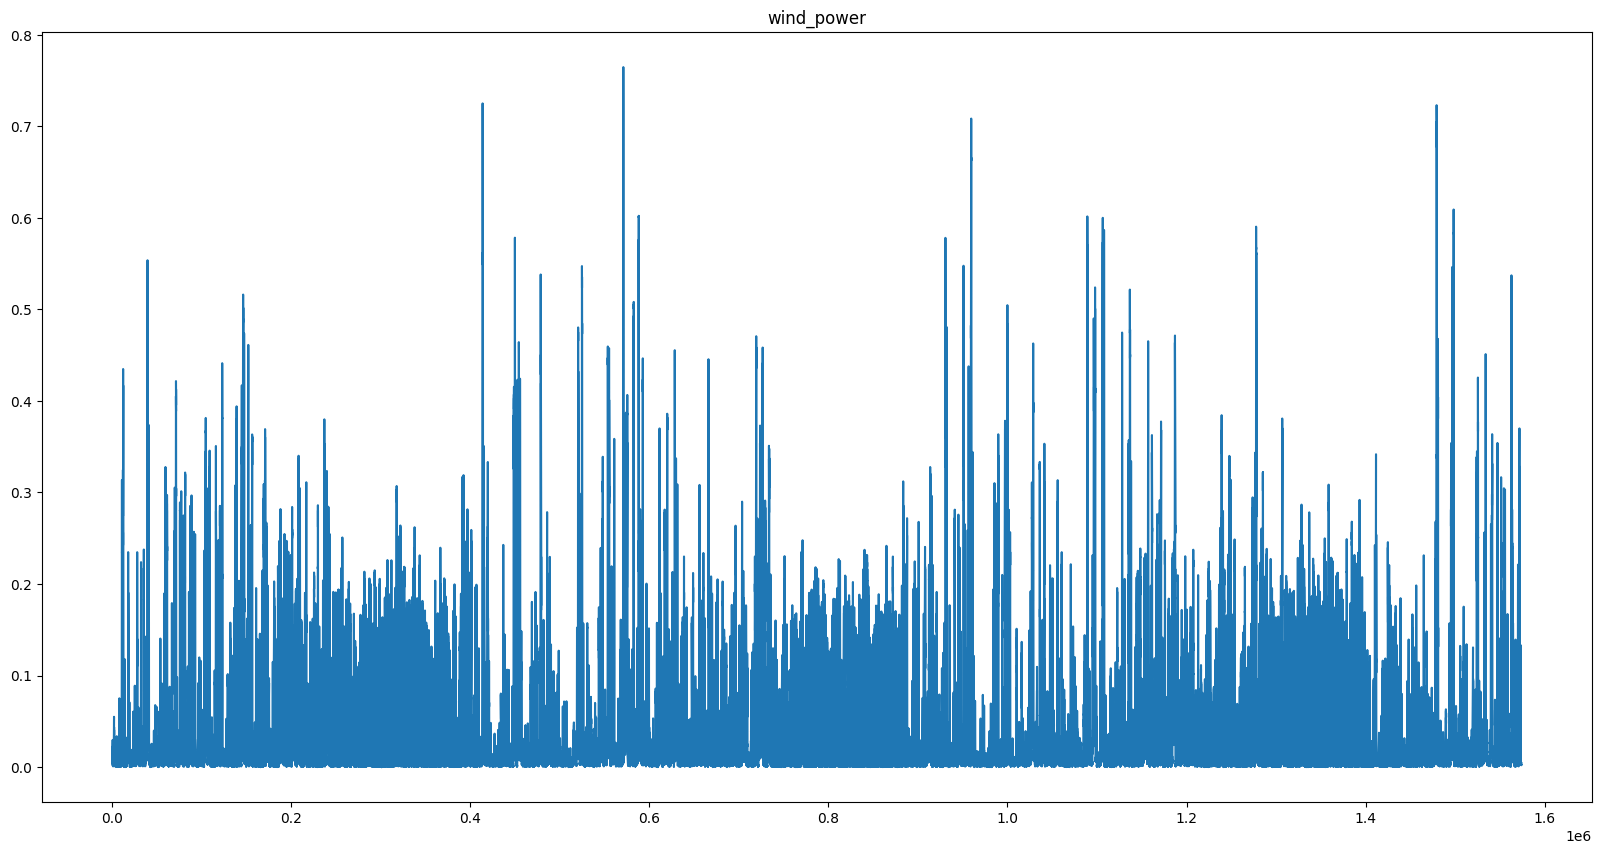

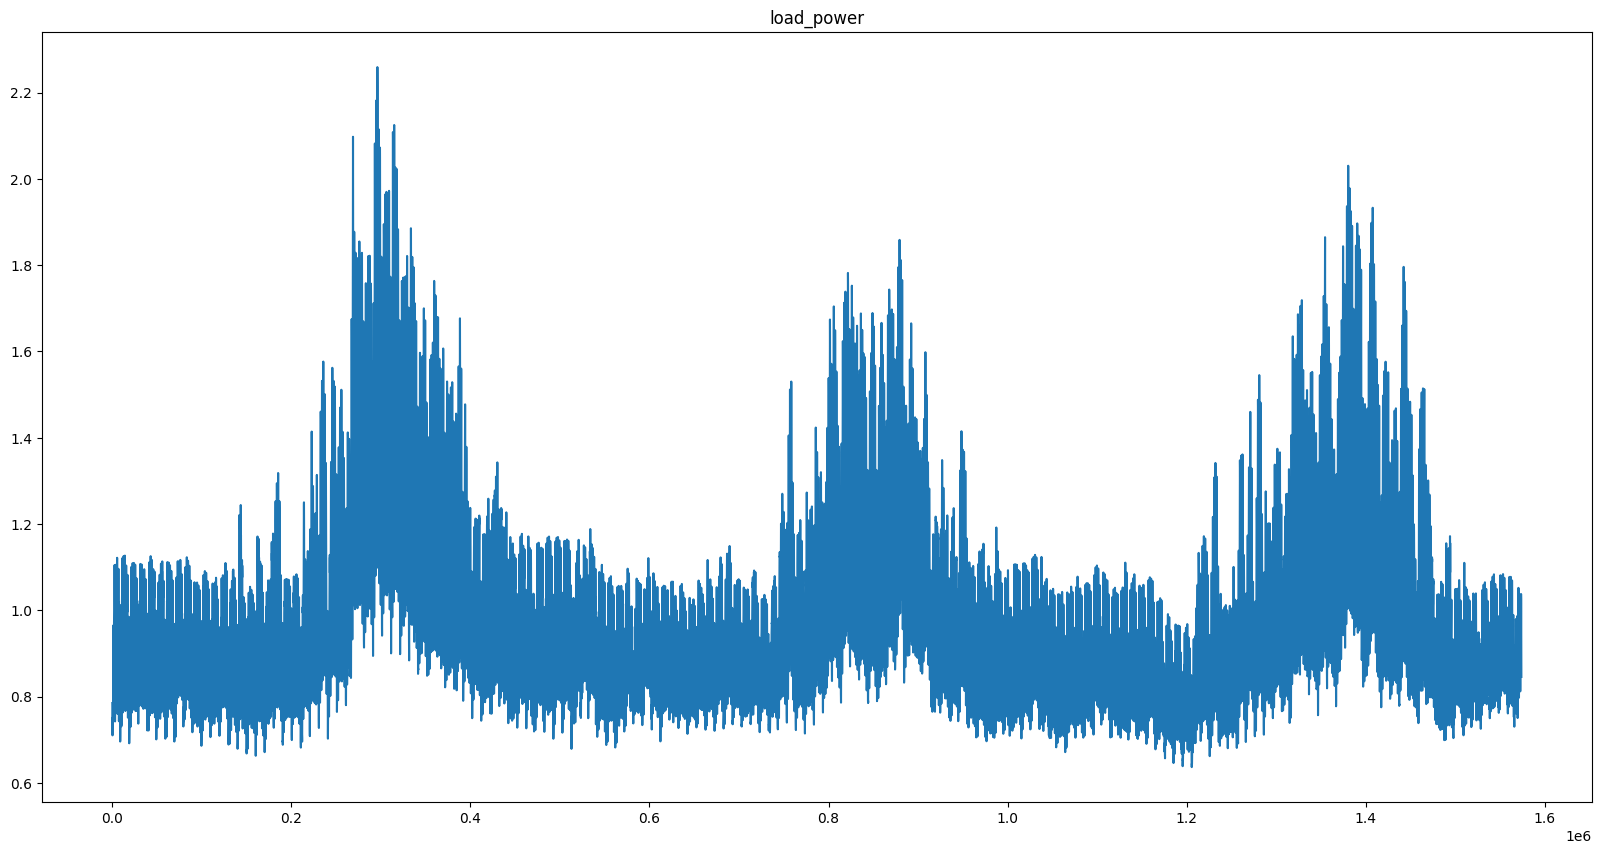

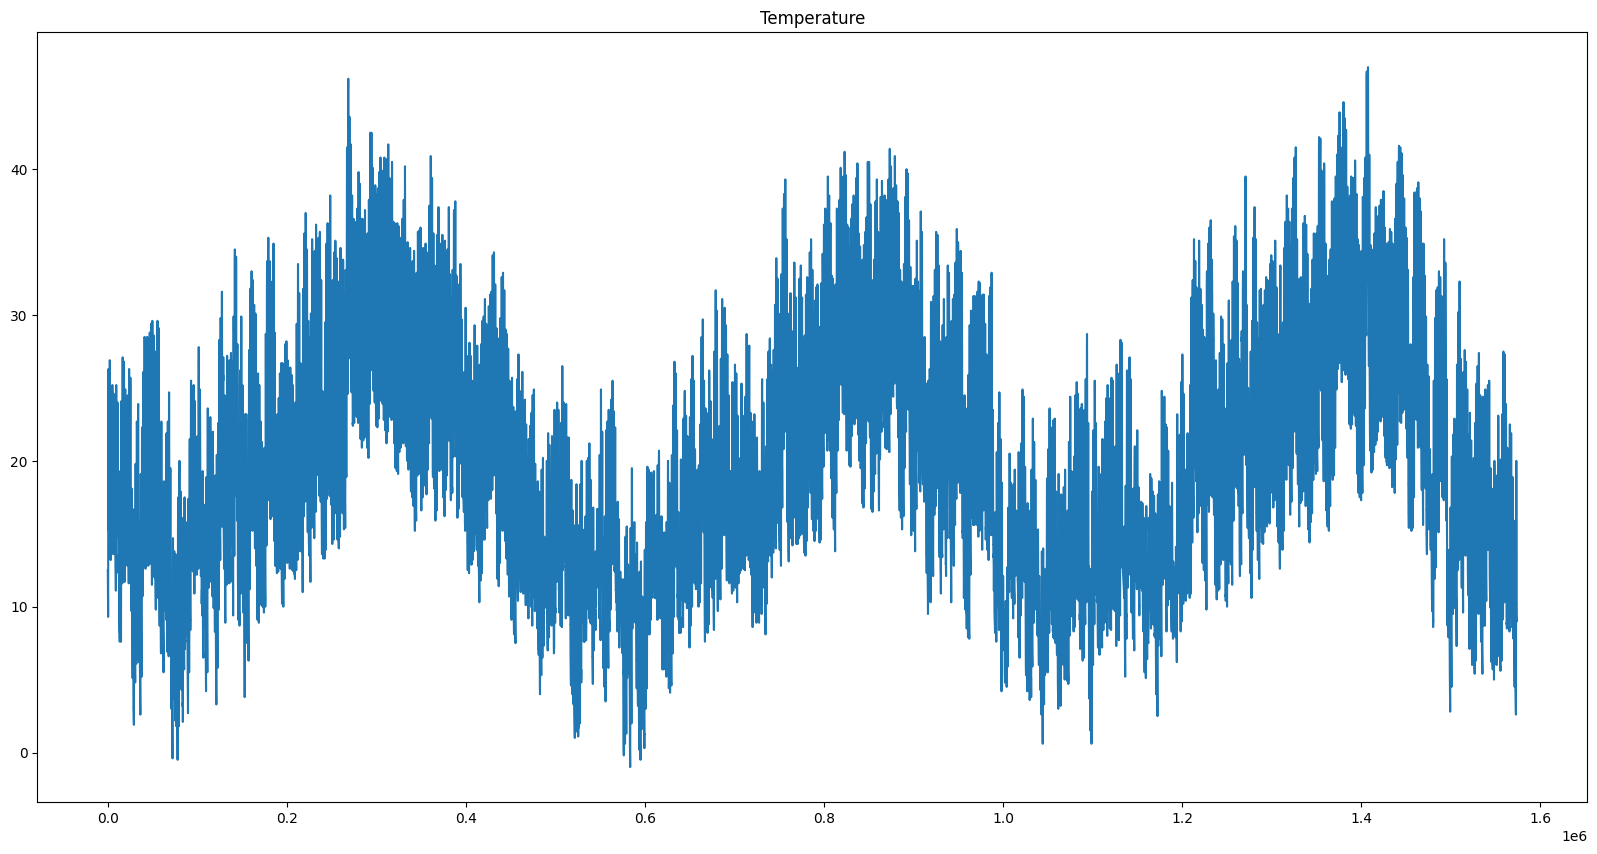

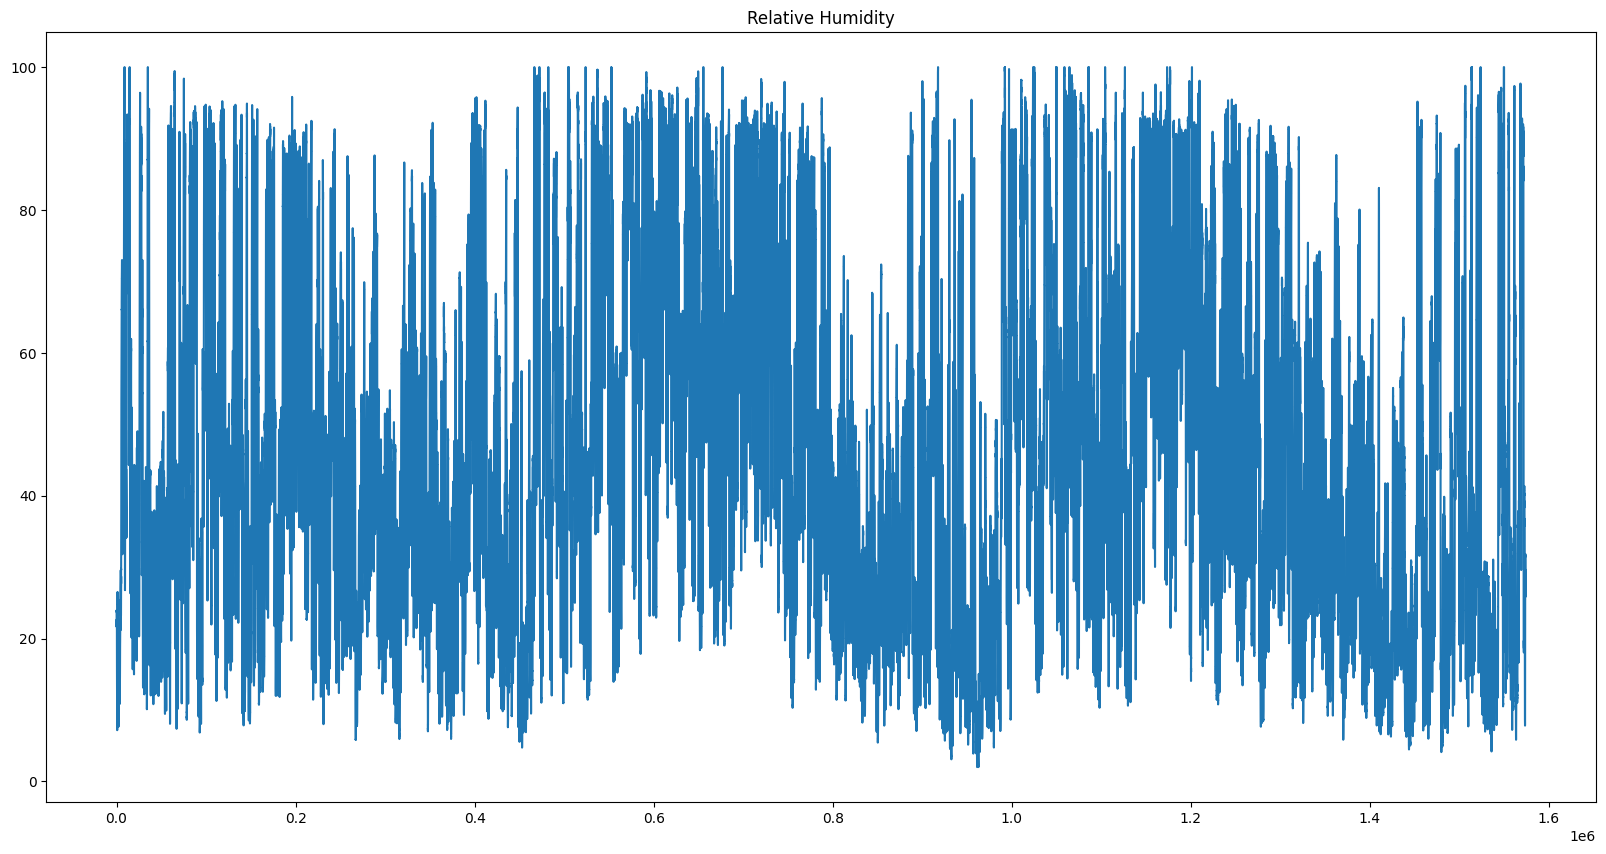

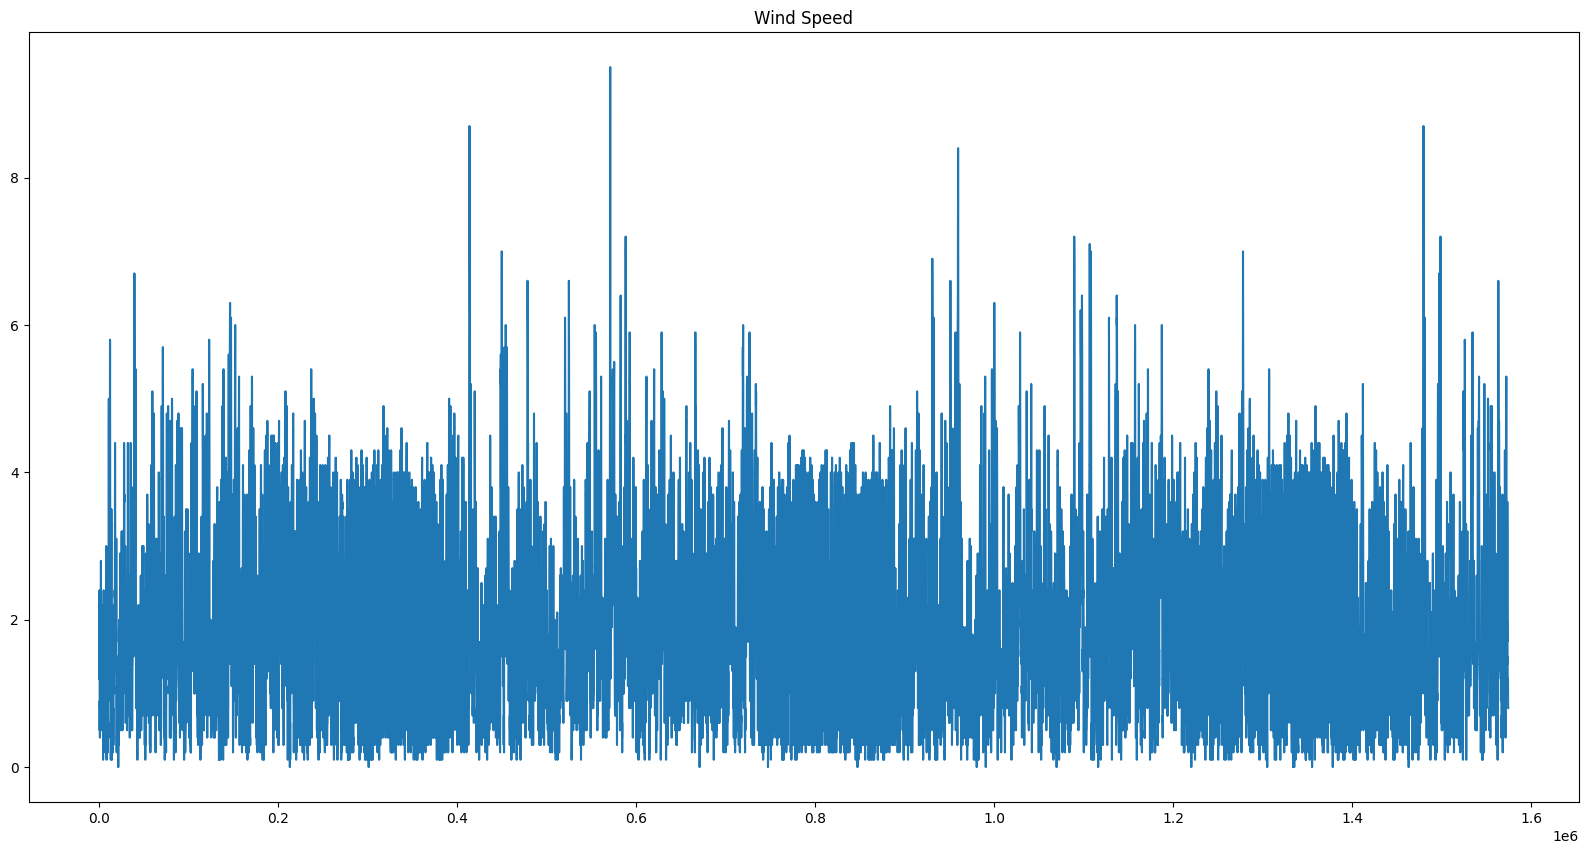

In [8]:
for attribute in attributes:
    if( attribute == 'time'):
        continue
    plt.figure(figsize=(20,10))
    plt.plot(df[attribute], label=attribute)
    plt.title(attribute)
# plt.figure(figsize=(20,10))
# plt.plot(df['GHI'], label='GHI')
# plt.title('GHI')

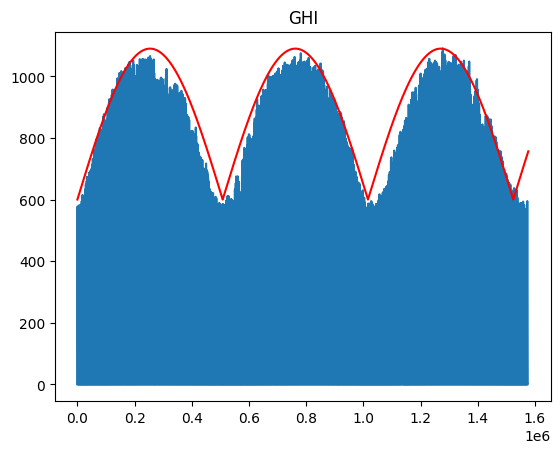

In [9]:

plt.plot(df['GHI'], label='GHI')
plt.title('GHI')

x = np.arange(year*3)
y=abs(np.sin(x/(year/3.25))*490) + 600
plt.plot(x,y, color='red')
plt.show()

In [20]:
#finding points where GHI drops dramatically 
reset_df()
i = 0
oldGHI = df['GHI'][i]
for GHI in df['GHI']:
    if(i>0):
        oldGHI = df['GHI'][i-1]
        if((GHI + 150) < oldGHI):
            print("old GHI: ", oldGHI)
            for attribute in attributes:
                print(attribute, df[attribute][i])
            print()
            print()
            print()
    i+=1

old GHI:  859.0
time 2019-03-20 11:11:00
solar_power 0.6225652500000001
GHI 699.4
DHI 117.0
DNI 718.4
Solar Zenith Angle 35.77
wind_power 0.0548433571653474
load_power 0.9239499459286808
Temperature 16.400000000000002
Relative Humidity 53.91
Wind Speed 2.9200000000000004



old GHI:  699.4
time 2019-03-20 11:12:00
solar_power 0.4766579999999999
GHI 539.8
DHI 103.0
DNI 538.8
Solar Zenith Angle 35.7
wind_power 0.0577447607211659
load_power 0.9237691862898648
Temperature 16.400000000000002
Relative Humidity 53.91
Wind Speed 2.9400000000000004



old GHI:  539.8
time 2019-03-20 11:13:00
solar_power 0.33075075
GHI 380.2
DHI 89.0
DNI 359.2000000000001
Solar Zenith Angle 35.63
wind_power 0.0606461642769843
load_power 0.9235884266510486
Temperature 16.400000000000002
Relative Humidity 53.91
Wind Speed 2.96



old GHI:  380.2
time 2019-03-20 11:14:00
solar_power 0.1848435
GHI 220.6
DHI 75.0
DNI 179.60000000000005
Solar Zenith Angle 35.56
wind_power 0.0635475678328028
load_power 0.92340766701223

In [28]:
i = 0
oldGHI = df_per_day['GHI'][i]
for GHI in df_per_day['GHI']:
    if(i>0):
        oldGHI = df_per_day['GHI'][i-1]
        if((GHI + 150) < oldGHI):
            print("old GHI: ", oldGHI)
            for attribute in df_per_day_attributes:
                print(attribute, df_per_day[attribute][i])
            print()
            print()
            print()
    i+=1

old GHI:  211.98958333333334
time 2018-03-10 00:00:00
DHI 47.677083333333336
GHI 48.611111111111114
DNI 1.8194444444444444



old GHI:  326.2326388888889
time 2018-04-19 00:00:00
DHI 81.72222222222223
GHI 149.75694444444446
DNI 137.10416666666666



old GHI:  343.7638888888889
time 2018-05-11 00:00:00
DHI 91.08333333333333
GHI 125.08333333333333
DNI 67.59375



old GHI:  323.83680555555554
time 2018-05-26 00:00:00
DHI 91.79166666666667
GHI 161.54513888888889
DNI 122.66319444444444



old GHI:  221.32638888888889
time 2018-10-13 00:00:00
DHI 45.392361111111114
GHI 48.84375
DNI 14.177083333333334



old GHI:  279.2013888888889
time 2019-04-15 23:59:00
DHI 58.10069444444444
GHI 62.576388888888886
DNI 14.743055555555555



old GHI:  358.0555555555556
time 2019-05-25 23:59:00
DHI 73.32986111111111
GHI 81.86458333333333
DNI 23.70138888888889



old GHI:  193.55208333333334
time 2020-02-08 23:58:00
DHI 38.204861111111114
GHI 42.37152777777777
DNI 9.25



old GHI:  195.37152777777777
time 2020

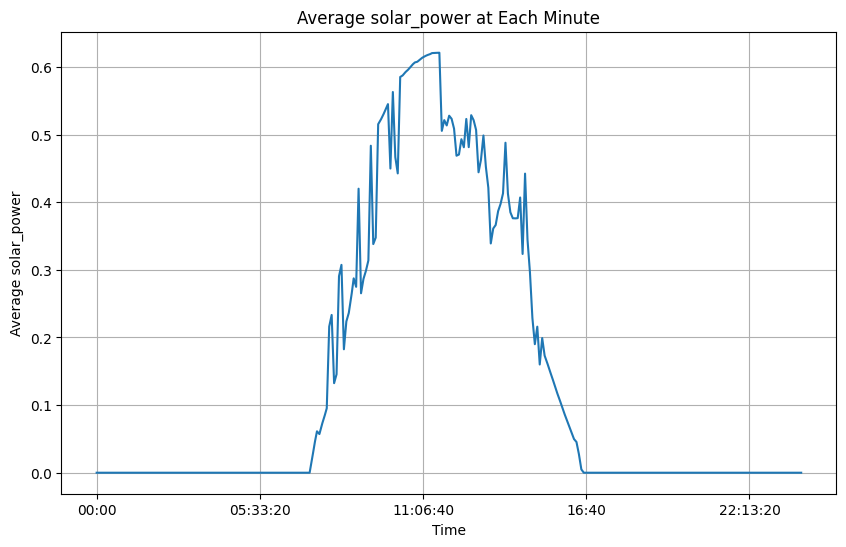

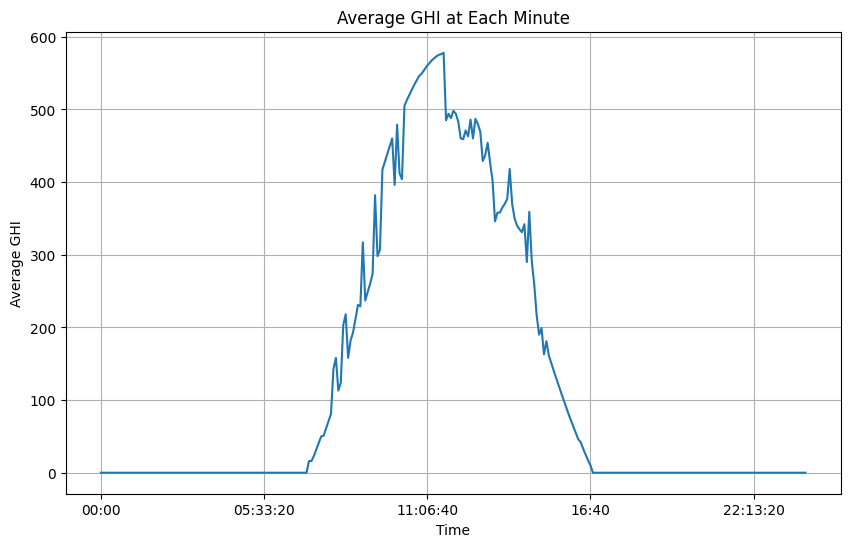

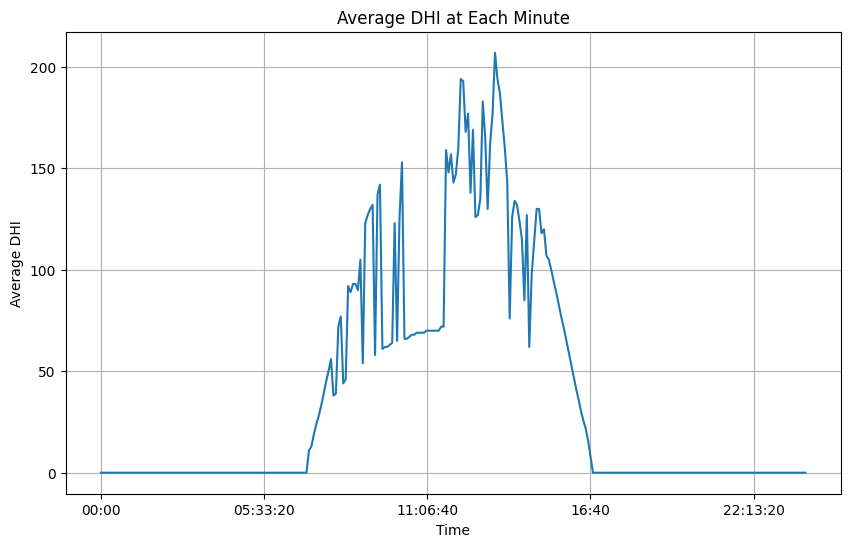

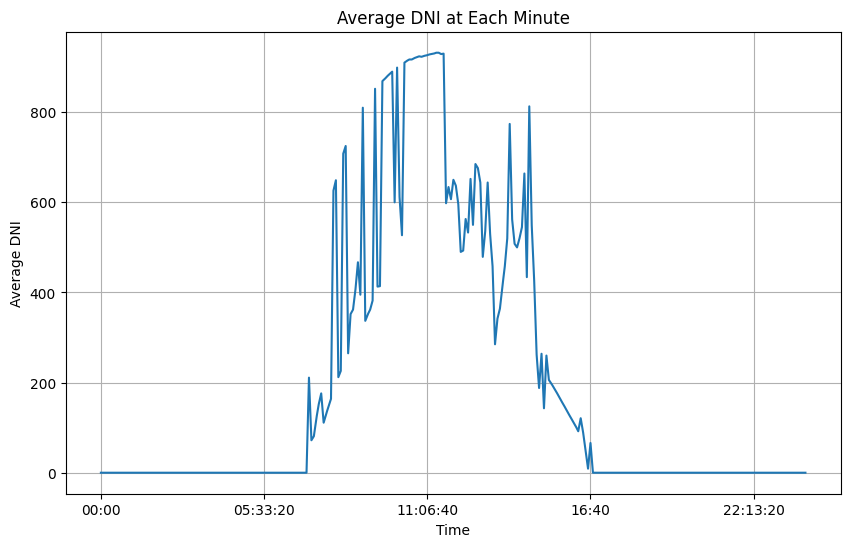

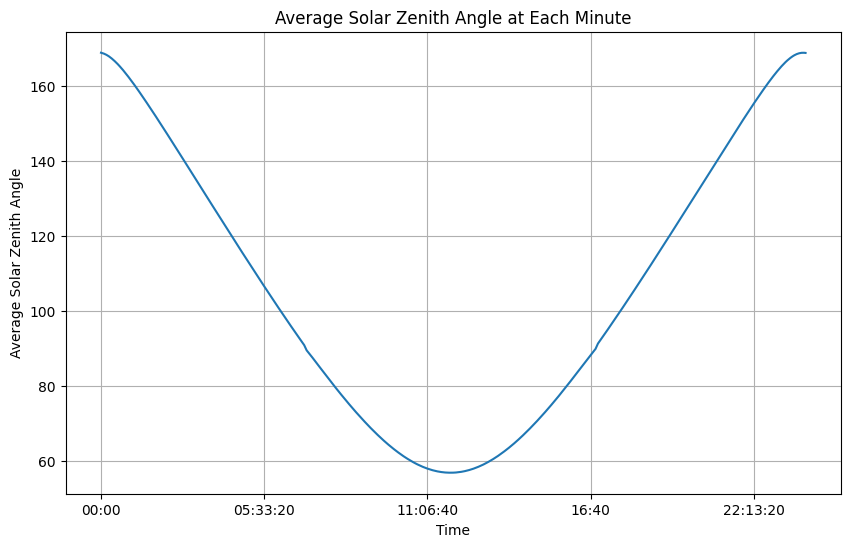

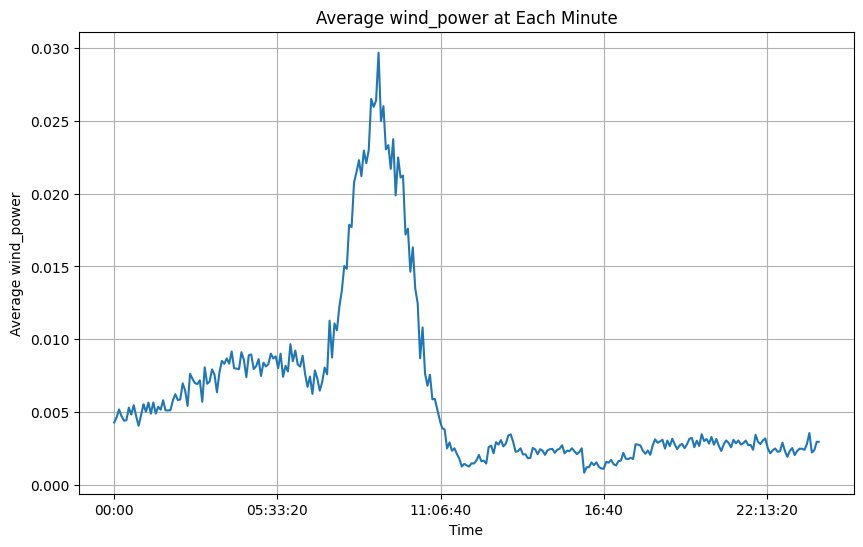

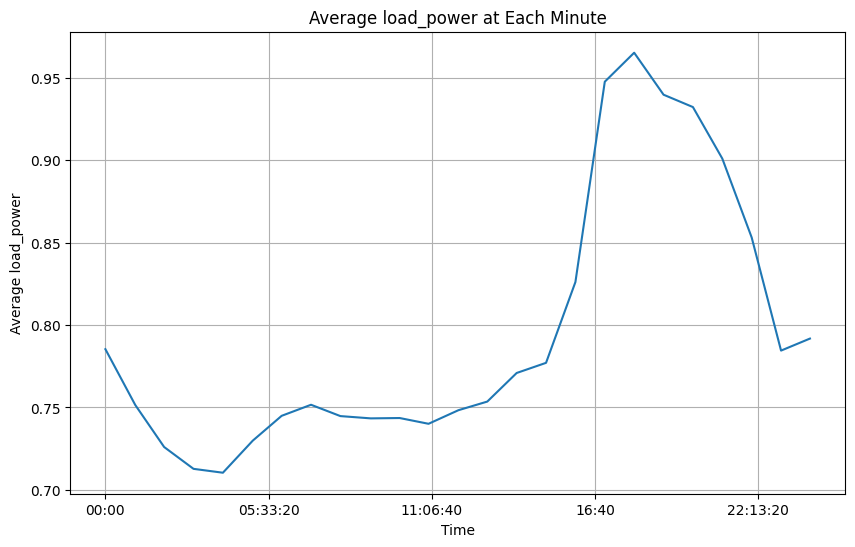

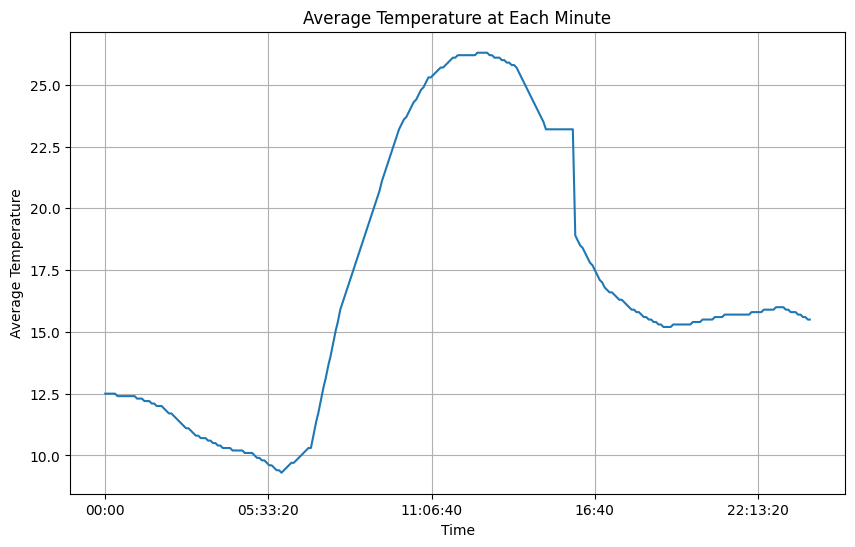

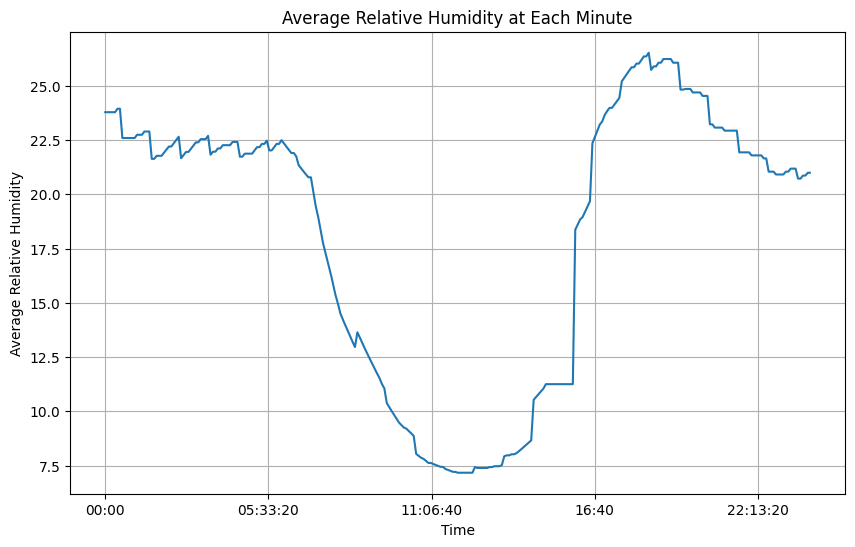

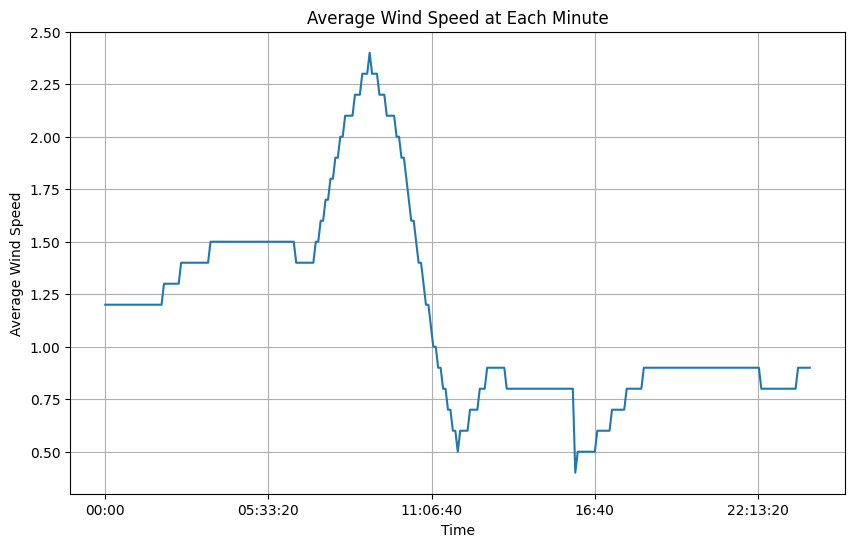

In [8]:
for attribute in attributes:
    if attribute == "time":
        continue
    average = df.groupby('time')[attribute].mean()
    plt.figure(figsize=(10, 6))
    average.plot(kind='line')
    plt.xlabel('Time')
    plt.ylabel(f'Average {attribute}')
    plt.title(f'Average {attribute} at Each Minute')
    plt.grid(True)
    plt.show()

In [31]:
energy_path = r'C:\Users\super\Downloads\eia8602019\3_3_Solar_Y2019.xlsx'
energy_PP_data = pd.read_csv(energy_path, delimiter = ',')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xde in position 16: invalid continuation byte

In [17]:
df.cov()
df.corr()

,time,solar_power,GHI,DHI,DNI,Solar Zenith Angle,wind_power,load_power,Temperature,Relative Humidity,Wind Speed
time,1.000000,0.002148,-0.000643,-0.025143,0.017718,0.015541,-0.006900,-0.038868,0.077462,-0.067270,-0.017956
solar_power,0.002148,1.000000,0.979745,0.645480,0.920296,-0.823113,0.443240,0.243264,0.627536,-0.589329,0.578119
GHI,-0.000643,0.979745,1.000000,0.666132,0.900923,-0.842213,0.433831,0.300585,0.684280,-0.581323,0.577962
DHI,-0.025143,0.645480,0.666132,1.000000,0.471425,-0.739917,0.380216,0.199727,0.477184,-0.381638,0.507466
DNI,0.017718,0.920296,0.900923,0.471425,1.000000,-0.773695,0.382386,0.276198,0.628189,-0.608251,0.520003
Solar Zenith Angle,0.015541,-0.823113,-0.842213,-0.739917,-0.773695,1.000000,-0.442620,-0.338508,-0.646268,0.509917,-0.582668
wind_power,-0.006900,0.443240,0.433831,0.380216,0.382386,-0.442620,1.000000,0.151239,0.196948,-0.235164,0.880694
load_power,-0.038868,0.243264,0.300585,0.199727,0.276198,-0.338508,0.151239,1.000000,0.657843,-0.396918,0.213146
Temperature,0.077462,0.627536,0.684280,0.477184,0.628189,-0.646268,0.196948,0.657843,1.000000,-0.680077,0.276001
Relative Humidity,-0.067270,-0.589329,-0.581323,-0.381638,-0.608251,0.509917,-0.235164,-0.396918,-0.680077,1.000000,-0.312982


In [51]:
import matplotlib.pyplot as plt
plt.imshow(df.corr(), cmap='RdBu', interpolation='nearest')
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()

TypeError: float() argument must be a string or a real number, not 'datetime.time'

In [15]:
df.index = df['time']
df.drop(columns='time') 

,solar_power,GHI,DHI,DNI,Solar Zenith Angle,wind_power,load_power,Temperature,Relative Humidity,Wind Speed
time,,,,,,,,,,
00:00:00,0.0,0.0,0.0,0.0,168.880,0.004276,0.785327,12.5,23.78,1.2
00:01:00,0.0,0.0,0.0,0.0,168.842,0.004346,0.784770,12.5,23.78,1.2
00:02:00,0.0,0.0,0.0,0.0,168.804,0.004416,0.784213,12.5,23.78,1.2
00:03:00,0.0,0.0,0.0,0.0,168.766,0.004486,0.783657,12.5,23.78,1.2
00:04:00,0.0,0.0,0.0,0.0,168.728,0.004556,0.783100,12.5,23.78,1.2
...,...,...,...,...,...,...,...,...,...,...
23:55:00,0.0,0.0,0.0,0.0,168.880,0.002949,0.791267,15.5,20.99,0.9
23:56:00,0.0,0.0,0.0,0.0,168.866,0.002950,0.791390,15.5,20.99,0.9
23:57:00,0.0,0.0,0.0,0.0,168.852,0.002951,0.791514,15.5,20.99,0.9


In [ ]:
#Auto correlation and partial correlation to see if has variation over time. 
#How much does past data effect current data. Helps to determine how far need to chunk data in terms of new samples.

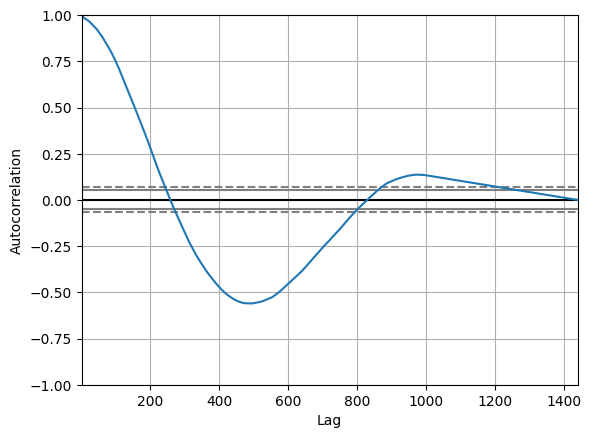

In [17]:
#take auto correletion of df
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df["solar_power"])
plt.show()